# Lempel Ziv Markov Algorithm

- lossless compression
- dictionary compression (variable up to 4 GB)
- improved Deflate algorithm (LZ77 + Huffman)
- binary arithmetic coding

Materials:
- http://mattmahoney.net/dc/dce.html#Section_523
- https://www.youtube.com/watch?v=goOa3DGezUA
- https://docs.python.org/3/library/lzma.html
- https://catchchallenger.first-world.info/wiki/Quick_Benchmark:_Gzip_vs_Bzip2_vs_LZMA_vs_XZ_vs_LZ4_vs_LZO
- https://www.maximumcompression.com/data/summary_mf2.php
- https://cran.r-project.org/web/packages/brotli/vignettes/brotli-2015-09-22.pdf
- https://help.2brightsparks.com/support/solutions/articles/43000335985

---

In [265]:
import lzma
import os
import matplotlib.pyplot as plt
import zlib
import gzip
import bz2
import zstd
import snappy # for windows https://www.lfd.uci.edu/~gohlke/pythonlibs/#python-snappy

In [109]:
plt.style.use("ggplot")

In [11]:
def load_data(filename):
    with open(f"../Data/{filename}", 'rb') as f:
        return f.read()

In [87]:
czech = load_data('czech.txt')
english = load_data('english.txt')
french = load_data('french.txt')
german = load_data('german.txt')
hungarian = load_data('hungarian.txt')
unknown0 = load_data('unknown0.txt')
unknown1 = load_data('unknown1.txt')
unknown2 = load_data('unknown2.txt')
all = czech + english + french + german + hungarian + unknown0 + unknown1 + unknown2

data_files = [
    ('Czech', czech),
    ('English', english),
    ('French', french),
    ('German', german),
    ('Hungarian', hungarian),
    ('Unknown0', unknown0),
    ('Unknown1', unknown1),
    ('Unknown2', unknown2),
    ('All', all),
    ('A * 100', b'A' * 100),
    ('A * 1000', b'A' * 1000),
    ('A * 1000000', b'A' * 1000000),
    ('PRG 100', os.urandom(100)),
    ('PRG 1000', os.urandom(1000)),
    ('PRG 1000000', os.urandom(1000000))
]

---

In [117]:
def run(compress):
    print(f"{'File':<15} {'Original':>10} {'Compressed (default)':>20} {'Compression Ratio':>18} {'Saved space':>15}")
    for name, data in data_files:
          original_len = len(data)
          compressed = compress(data)
          compressed_len = len(compressed)
          compression_ratio = original_len / compressed_len
          saved_space = 1 - compressed_len / original_len

          print(f"{name:<15} {original_len:>10} {compressed_len:>20} {compression_ratio:>18.3f} {saved_space:>15.3f}")

In [131]:
print("LZMA")
%time run(lzma.compress)

LZMA
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                51816              2.911           0.657
English             150266                49564              3.032           0.670
French              150767                48844              3.087           0.676
German              232542                77964              2.983           0.665
Hungarian           214005                78300              2.733           0.634
Unknown0           1276201               418024              3.053           0.672
Unknown1            166419                49100              3.389           0.705
Unknown2            285797                97412              2.934           0.659
All                2626846               826264              3.179           0.685
A * 100                100                   68              1.471           0.320
A * 1000              1000                   76             13.158           0.924

In [139]:
print("zlib")
%time run(zlib.compress)

zlib
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                57058              2.644           0.622
English             150266                55481              2.708           0.631
French              150767                54807              2.751           0.636
German              232542                88254              2.635           0.620
Hungarian           214005                87629              2.442           0.591
Unknown0           1276201               513212              2.487           0.598
Unknown1            166419                55421              3.003           0.667
Unknown2            285797               112248              2.546           0.607
All                2626846              1020131              2.575           0.612
A * 100                100                   12              8.333           0.880
A * 1000              1000                   17             58.824           0.983

In [137]:
print("zlib (fast)")
%time run(lambda data: zlib.compress(data, level=1))

zlib (fast)
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                66567              2.266           0.559
English             150266                64709              2.322           0.569
French              150767                64399              2.341           0.573
German              232542               103554              2.246           0.555
Hungarian           214005               101619              2.106           0.525
Unknown0           1276201               595690              2.142           0.533
Unknown1            166419                66677              2.496           0.599
Unknown2            285797               132666              2.154           0.536
All                2626846              1193440              2.201           0.546
A * 100                100                   12              8.333           0.880
A * 1000              1000                   19             52.632         

In [138]:
print("zlib (best)")
%time run(lambda data: zlib.compress(data, level=9))

zlib (best)
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                56962              2.648           0.622
English             150266                55229              2.721           0.632
French              150767                54666              2.758           0.637
German              232542                87754              2.650           0.623
Hungarian           214005                87532              2.445           0.591
Unknown0           1276201               511553              2.495           0.599
Unknown1            166419                55179              3.016           0.668
Unknown2            285797               111932              2.553           0.608
All                2626846              1016687              2.584           0.613
A * 100                100                   12              8.333           0.880
A * 1000              1000                   17             58.824         

In [129]:
print("gzip")
%time run(gzip.compress)

gzip
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                56974              2.648           0.622
English             150266                55241              2.720           0.632
French              150767                54678              2.757           0.637
German              232542                87766              2.650           0.623
Hungarian           214005                87544              2.445           0.591
Unknown0           1276201               511565              2.495           0.599
Unknown1            166419                55191              3.015           0.668
Unknown2            285797               111944              2.553           0.608
All                2626846              1016699              2.584           0.613
A * 100                100                   24              4.167           0.760
A * 1000              1000                   29             34.483           0.971

In [128]:
print("gzip (fast)")
%time run(lambda data: gzip.compress(data, compresslevel=1))

gzip (fast)
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                66579              2.266           0.559
English             150266                64721              2.322           0.569
French              150767                64411              2.341           0.573
German              232542               103566              2.245           0.555
Hungarian           214005               101631              2.106           0.525
Unknown0           1276201               595702              2.142           0.533
Unknown1            166419                66689              2.495           0.599
Unknown2            285797               132678              2.154           0.536
All                2626846              1193452              2.201           0.546
A * 100                100                   24              4.167           0.760
A * 1000              1000                   31             32.258         

In [132]:
print("bzip2")
%time run(bz2.compress)

bzip2
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                47603              3.169           0.684
English             150266                44657              3.365           0.703
French              150767                44619              3.379           0.704
German              232542                70195              3.313           0.698
Hungarian           214005                72192              2.964           0.663
Unknown0           1276201               389215              3.279           0.695
Unknown1            166419                44486              3.741           0.733
Unknown2            285797                87185              3.278           0.695
All                2626846               814963              3.223           0.690
A * 100                100                   39              2.564           0.610
A * 1000              1000                   45             22.222           0.95

In [133]:
print("bzip2 (fast)")
%time run(lambda data: bz2.compress(data, compresslevel=1))

bzip2 (fast)
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                49399              3.054           0.673
English             150266                47600              3.157           0.683
French              150767                46969              3.210           0.688
German              232542                73836              3.149           0.682
Hungarian           214005                75956              2.817           0.645
Unknown0           1276201               445229              2.866           0.651
Unknown1            166419                46888              3.549           0.718
Unknown2            285797                95423              2.995           0.666
All                2626846               888711              2.956           0.662
A * 100                100                   39              2.564           0.610
A * 1000              1000                   45             22.222        

In [233]:
# https://github.com/facebook/zstd
print("ZSTD")
%time run(zstd.compress)

ZSTD
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                60571              2.490           0.598
English             150266                58212              2.581           0.613
French              150767                57667              2.614           0.618
German              232542                93193              2.495           0.599
Hungarian           214005                92754              2.307           0.567
Unknown0           1276201               500529              2.550           0.608
Unknown1            166419                59494              2.797           0.643
Unknown2            285797               113181              2.525           0.604
All                2626846               995004              2.640           0.621
A * 100                100                   17              5.882           0.830
A * 1000              1000                   19             52.632           0.981

In [263]:
print("ZSTD (ultra-fast)")
%time run(lambda data: zstd.compress(data, -5))

ZSTD (ultra-fast)
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                92756              1.626           0.385
English             150266                87487              1.718           0.418
French              150767                86815              1.737           0.424
German              232542               140817              1.651           0.394
Hungarian           214005               146543              1.460           0.315
Unknown0           1276201               939331              1.359           0.264
Unknown1            166419                86646              1.921           0.479
Unknown2            285797               206075              1.387           0.279
All                2626846              1845613              1.423           0.297
A * 100                100                   17              5.882           0.830
A * 1000              1000                   19             52.632   

In [240]:
print("ZSTD (fast)")
%time run(lambda data: zstd.compress(data, 1))

ZSTD (fast)
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                63332              2.382           0.580
English             150266                60001              2.504           0.601
French              150767                59852              2.519           0.603
German              232542                97649              2.381           0.580
Hungarian           214005                97623              2.192           0.544
Unknown0           1276201               576045              2.215           0.549
Unknown1            166419                61334              2.713           0.631
Unknown2            285797               131708              2.170           0.539
All                2626846              1147917              2.288           0.563
A * 100                100                   17              5.882           0.830
A * 1000              1000                   19             52.632         

In [243]:
print("ZSTD (best)")
%time run(lambda data: zstd.compress(data, 22))

ZSTD (best)
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                53008              2.846           0.649
English             150266                50731              2.962           0.662
French              150767                50125              3.008           0.668
German              232542                79831              2.913           0.657
Hungarian           214005                80171              2.669           0.625
Unknown0           1276201               422626              3.020           0.669
Unknown1            166419                50328              3.307           0.698
Unknown2            285797                99514              2.872           0.652
All                2626846               842430              3.118           0.679
A * 100                100                   16              6.250           0.840
A * 1000              1000                   18             55.556         

In [268]:
print("snappy")
%time run(snappy.compress)

snappy
File              Original Compressed (default)  Compression Ratio     Saved space
Czech               150849                90217              1.672           0.402
English             150266                88210              1.704           0.413
French              150767                87231              1.728           0.421
German              232542               140880              1.651           0.394
Hungarian           214005               141767              1.510           0.338
Unknown0           1276201               831833              1.534           0.348
Unknown1            166419                89570              1.858           0.462
Unknown2            285797               183969              1.554           0.356
All                2626846              1654425              1.588           0.370
A * 100                100                    9             11.111           0.910
A * 1000              1000                   52             19.231           0.9

In [271]:
algorithms = [
    ("LZMA", lzma.compress),
    ("zlib", zlib.compress),
    ("zlib (fast)", lambda data: zlib.compress(data, level=1)),
    ("zlib (best)", lambda data: zlib.compress(data, level=9)),
    ("gzip", gzip.compress),
    ("gzip (fast)", lambda data: gzip.compress(data, compresslevel=1)),
    ("bzip2", bz2.compress),
    ("bzip2 (fast)", lambda data: bz2.compress(data, compresslevel=1)),
    ("Zstandard", zstd.compress),
    ("Zstandard (ultra-fast)", lambda data: zstd.compress(data, -5)),
    ("Zstandard (fast)", lambda data: zstd.compress(data, 1)),
    ("Zstandard (best)", lambda data: zstd.compress(data, 22)),
    ("Snappy", snappy.compress)
]

results = []
for alg_name, alg in algorithms:
    items = []
    for data_name, data in data_files:
        compressed_len = len(alg(data))
        compression_ratio = len(data) / compressed_len
        items.append(compression_ratio)
    results.append(items)

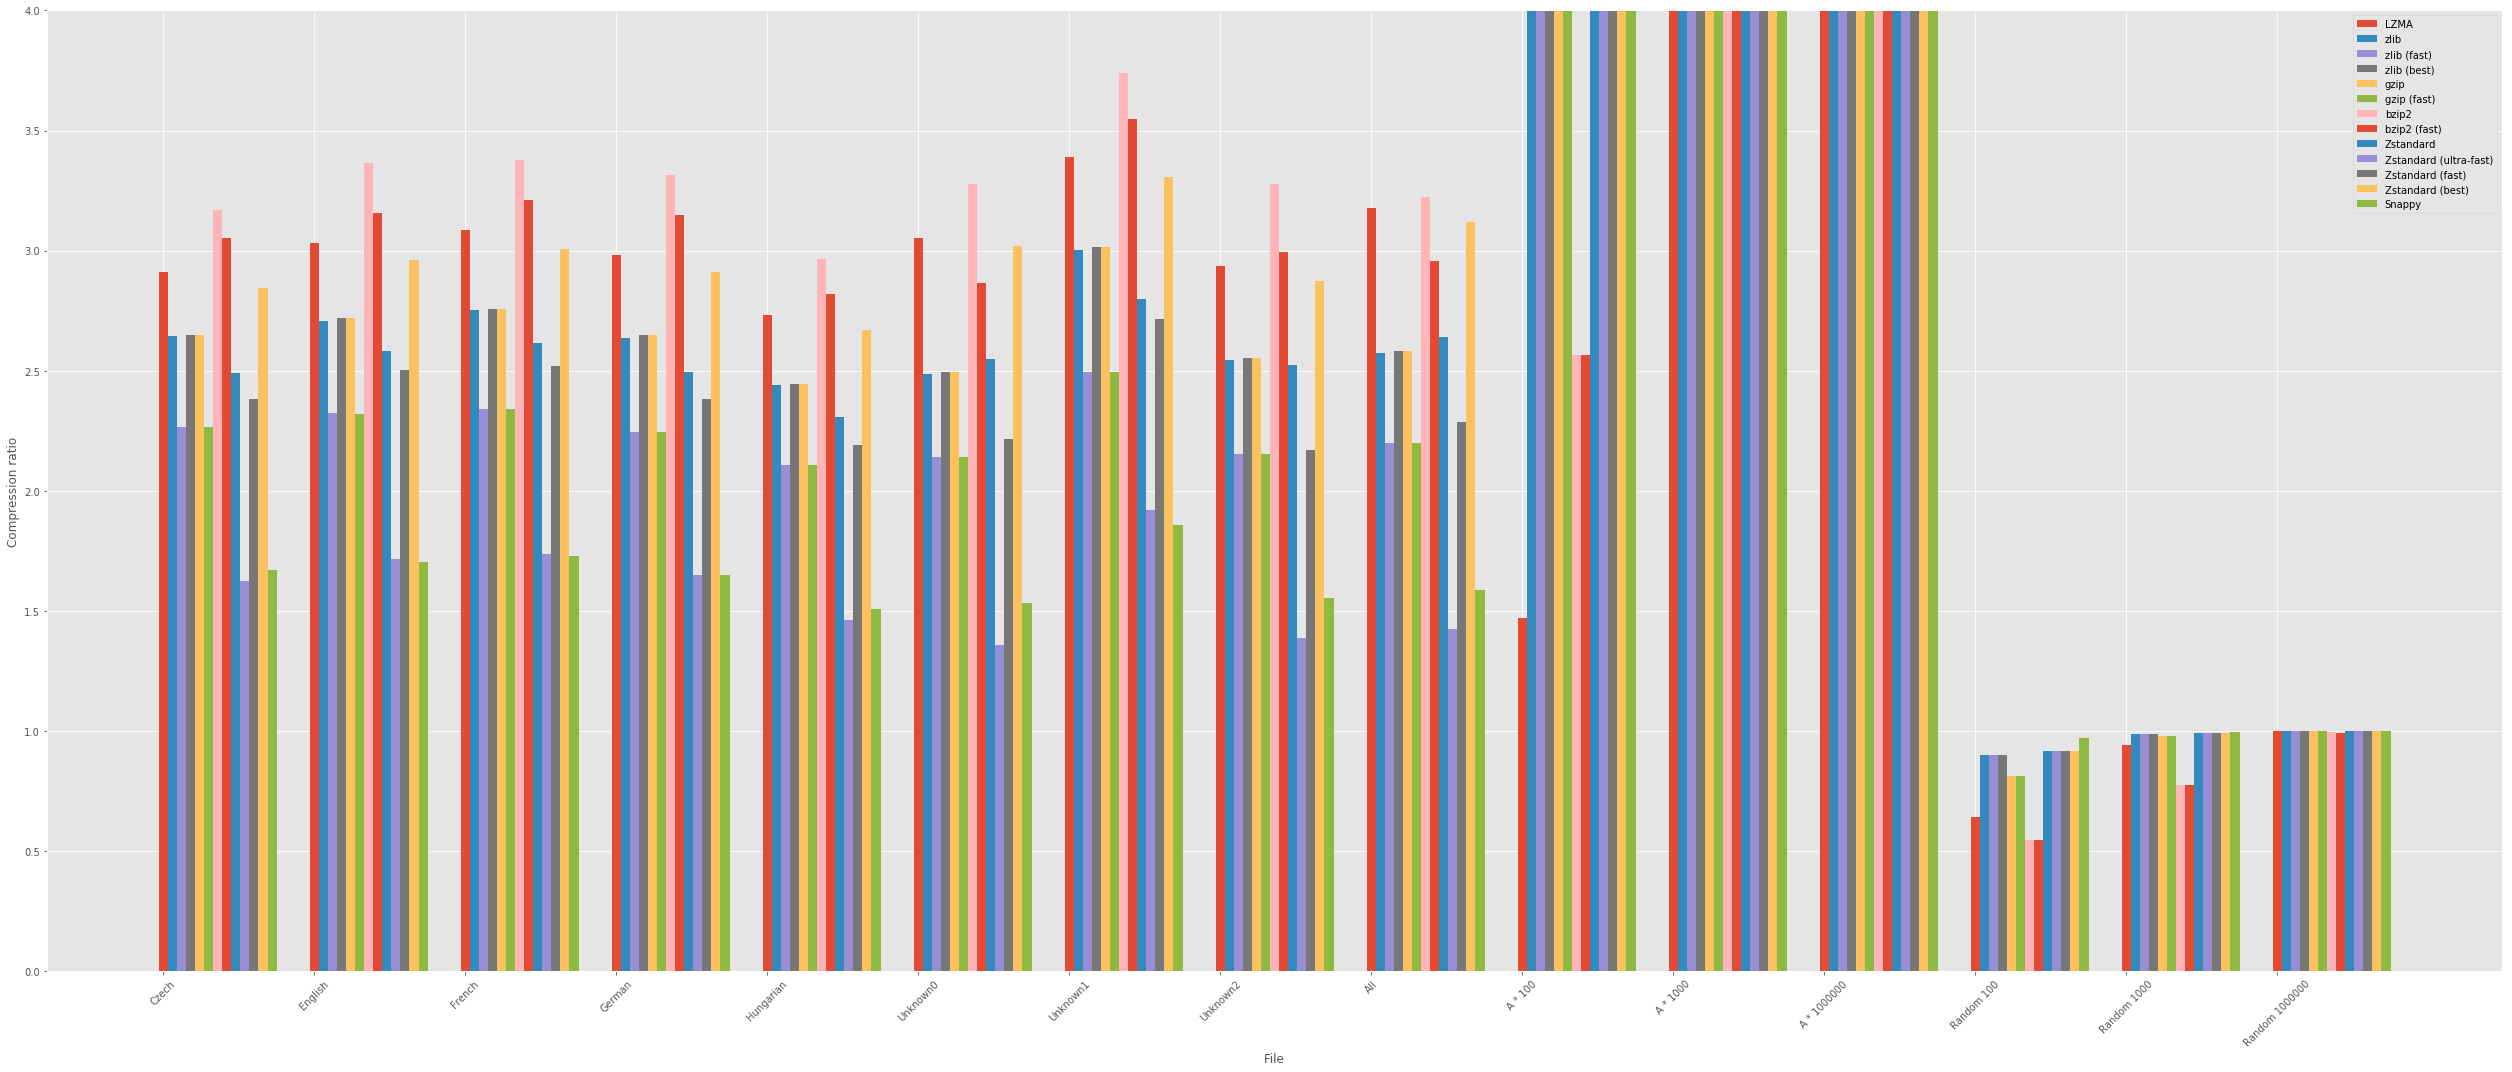

In [370]:
plt.figure(figsize=(35, 15))
#alg_names = [name for name, _ in algorithms]
file_names = [name for name, _ in data_files]
x = np.arange(len(file_names))
xi = 0.06
w = 0.06

for i, (alg_name, alg_results) in enumerate(zip(alg_names, results)):
    plt.bar(x + i * xi, alg_results, w, label=alg_name)

plt.ylim(top=4)
plt.legend()
plt.xticks(x, file_names, rotation=45)
plt.xlabel("File")
plt.ylabel("Compression ratio")
plt.tight_layout()
plt.savefig('compression-ratio.png')
plt.show()

# Compression speed

In [322]:
algorithms = [
    ("LZMA", lzma.compress),
    ("zlib", zlib.compress),
    ("zlib (fast)", lambda data: zlib.compress(data, level=1)),
    ("zlib (best)", lambda data: zlib.compress(data, level=9)),
    ("gzip", gzip.compress),
    ("gzip (fast)", lambda data: gzip.compress(data, compresslevel=1)),
    ("bzip2", bz2.compress),
    ("bzip2 (fast)", lambda data: bz2.compress(data, compresslevel=1)),
    ("Zstandard", zstd.compress),
    ("Zstandard (ultra-fast)", lambda data: zstd.compress(data, -5)),
    ("Zstandard (fast)", lambda data: zstd.compress(data, 1)),
    ("Zstandard (best)", lambda data: zstd.compress(data, 22)),
    ("Snappy", snappy.compress)
]

def run_time(compress):
    for name, data in data_files:
          compressed = compress(data)

times = []
for alg_name, alg in algorithms:
    t = %timeit -o run_time(alg)
    times.append(t)

5.35 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
489 ms ± 8.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
145 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
653 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
658 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
156 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
719 ms ± 8.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
672 ms ± 4.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
79.8 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
25 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.7 ms ± 973 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.73 s ± 175 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
27.7 ms ± 834 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [333]:
print(f"{'Algorithm':<25} {'Average [ms]':>15} {'Std. Dev. [ms]':>20}")
for (alg_name, _), t in zip(algorithms, times):
    print(f"{alg_name:<25} {t.average * 1000:>15.3f} {t.stdev * 1000:>20.3f}")

Algorithm                    Average [ms]       Std. Dev. [ms]
LZMA                             5349.432              126.468
zlib                              488.693                8.868
zlib (fast)                       145.236                1.473
zlib (best)                       653.451               14.362
gzip                              658.150               10.156
gzip (fast)                       155.738                1.982
bzip2                             718.739                8.609
bzip2 (fast)                      671.589                4.791
Zstandard                          79.788                0.317
Zstandard (ultra-fast)             25.011                0.474
Zstandard (fast)                   37.728                0.973
Zstandard (best)                 2727.590              174.618
Snappy                             27.739                0.834


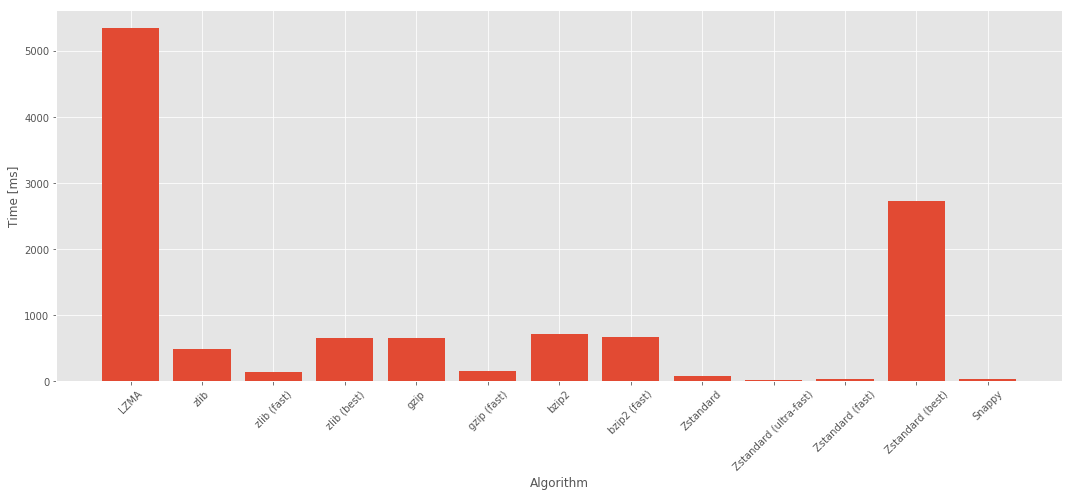

In [369]:
plt.figure(figsize=(15, 7))
#alg_names = [name for name, _ in algorithms]
x = np.arange(len(alg_names))
y = [t.average * 1000 for t in times]

plt.bar(x, y)
plt.xticks(x, alg_names, rotation=45)
plt.xlabel("Algorithm")
plt.ylabel("Time [ms]")
plt.tight_layout()
plt.savefig("compression.png")
plt.show()

# Decompression speed

In [351]:
algorithms = [
    ("LZMA", lzma.compress, lzma.decompress),
    ("zlib", zlib.compress, zlib.decompress),
    ("zlib (fast)", lambda data: zlib.compress(data, level=1), zlib.decompress),
    ("zlib (best)", lambda data: zlib.compress(data, level=9), zlib.decompress),
    ("gzip", gzip.compress, gzip.decompress),
    ("gzip (fast)", lambda data: gzip.compress(data, compresslevel=1), gzip.decompress),
    ("bzip2", bz2.compress, bz2.decompress),
    ("bzip2 (fast)", lambda data: bz2.compress(data, compresslevel=1), bz2.decompress),
    ("Zstandard", zstd.compress, zstd.decompress),
    ("Zstandard (ultra-fast)", lambda data: zstd.compress(data, -5), zstd.decompress),
    ("Zstandard (fast)", lambda data: zstd.compress(data, 1), zstd.decompress),
    ("Zstandard (best)", lambda data: zstd.compress(data, 22), zstd.decompress),
    ("Snappy", snappy.compress, snappy.decompress)
]

def run_time(compressed_data, decompress):
    for data in compressed_data:
          compressed = decompress(data)

decompress_times = []
for alg_name, compress, decompress in algorithms:
    compressed_data = [compress(data) for name, data in data_files]
    
    t = %timeit -o run_time(compressed_data, decompress)
    decompress_times.append(t)

267 ms ± 7.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
37.6 ms ± 664 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
36.3 ms ± 984 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.4 ms ± 707 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
52.9 ms ± 852 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.9 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
378 ms ± 34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
312 ms ± 9.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.1 ms ± 582 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
11 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.3 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19 ms ± 576 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.7 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [353]:
print(f"{'Algorithm':<25} {'Average [ms]':>15} {'Std. Dev. [ms]':>20}")
for (alg_name, _, _), t in zip(algorithms, decompress_times):
    print(f"{alg_name:<25} {t.average * 1000:>15.3f} {t.stdev * 1000:>20.3f}")

Algorithm                    Average [ms]       Std. Dev. [ms]
LZMA                              267.036                7.665
zlib                               37.637                0.664
zlib (fast)                        36.345                0.984
zlib (best)                        37.401                0.707
gzip                               52.880                0.852
gzip (fast)                        51.909                1.072
bzip2                             378.147               33.997
bzip2 (fast)                      311.932                9.780
Zstandard                          20.097                0.582
Zstandard (ultra-fast)             11.032                0.165
Zstandard (fast)                   15.263                0.189
Zstandard (best)                   19.026                0.576
Snappy                             10.742                0.218


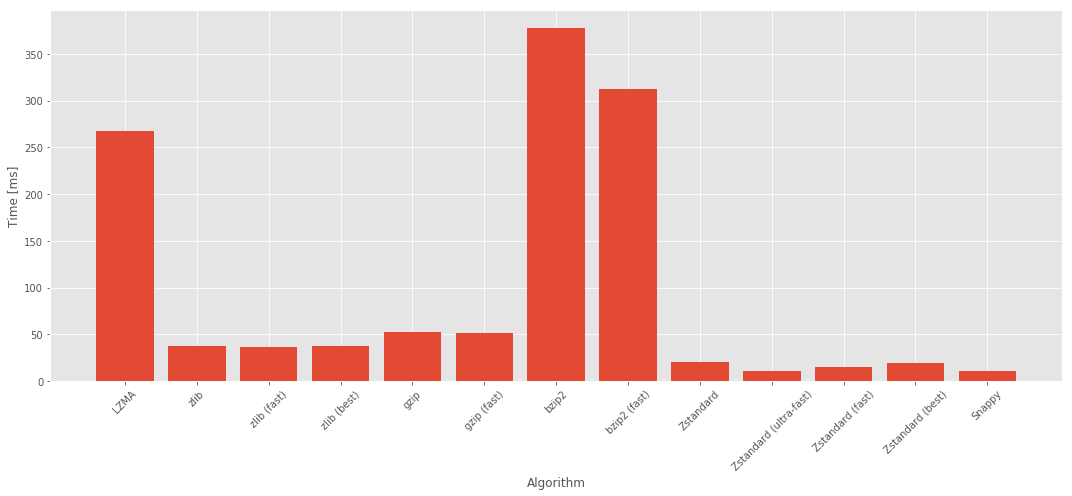

In [368]:
plt.figure(figsize=(15, 7))
#alg_names = [name for name, _, _ in algorithms]
x = np.arange(len(alg_names))
y = [t.average * 1000 for t in decompress_times]

plt.bar(x, y)
plt.xticks(x, alg_names, rotation=45)
plt.xlabel("Algorithm")
plt.ylabel("Time [ms]")
plt.tight_layout()
plt.savefig("decompression.png")
plt.show()

---

In [74]:
len(all)

2626846

In [75]:
len(lzma.compress(all, format=lzma.FORMAT_XZ))

826264

In [76]:
len(lzma.compress(all, format=lzma.FORMAT_ALONE))

826088

In [77]:
len(lzma.compress(all, format=lzma.FORMAT_RAW, filters=[{"id":lzma.FILTER_LZMA1}]))

826075

In [78]:
len(lzma.compress(all, format=lzma.FORMAT_RAW, filters=[{"id":lzma.FILTER_LZMA2}]))

826202